# **Support Vector Machine based Soft Sensor Code**
**Step 1. Reset all variables and import the required libraries.**

In [1]:
%reset -f
import pandas as pd
from random import random
from random import uniform
from array import array
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Step 2. Mount the Google drive to access the dataset.**

In [2]:
# Importing the df
df = pd.read_csv('./Project_Data_Complete.csv')

The data set is now loaded, all checks performed done in the RS code will be skiped. The outliers are removed below.

**Step 3. Pre-process the data.**


In [3]:
#Remove outliers using IQRs
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

**Step 4. Split the data between train and test.**

In [4]:
features = ['Pressure','Valve']
X = df[features]
y = df['Flow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

**Step 5. Train the SVM model and test it.**

In [5]:
#Train the model
svr = SVR(kernel='poly', degree=7, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(X_train, y_train)
#Test
yfit = svr.predict(X_test)

**Step 6. Visualize the results**.


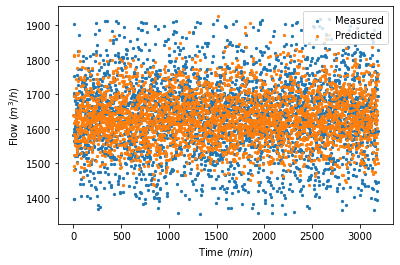

In [105]:
#Create the time variable
t = range(yfit.shape[0])
#Plot
plt.scatter(t, y_test, s=5, label="Measured")
plt.scatter(t, yfit, s=5, label="Predicted")
plt.xlabel('Time ($min$)')
plt.ylabel('Flow ($m^3/h$)')
plt.legend()
plt.show()

Check the $R^2$.

In [7]:
score = svr.score(X_test,y_test)
print("R-squared:", score)

R-squared: 0.41971193182918776


This $R^2$ is very low, let's see the behaviour of the prediction point by point. Let's plot the results.

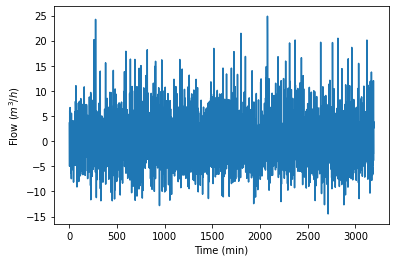

In [8]:
#Transform the arrays into numpy arrays
#to facilitate the process
y = np.array(y_test)
yfit = np.array(yfit)
yr = y.reshape(-1,1)
yfitr = yfit.reshape(-1,1)
#Define the error array (it is actually a list)
error_all = []
#Calculate all the errors
for i in range(len(y)):
  re = (yfit[i]-y[i])/y[i]*100
  error_all.append(re)
#Plot the error
plt.xlabel('Time (min)')
plt.ylabel('Flow ($m^3/h$)')
plt.plot(t,error_all);

Notice that even with low $R^2$, the prediction errors are distributed around zero and generally below 10 %. Let's check the summary statistics and the error distribution.

In [9]:
error_df = pd.DataFrame(error_all)
error_df.describe()

,0
count,3192.000000
mean,0.273400
std,5.007846
min,-14.464793
25%,-3.298141
50%,0.050121
75%,3.274889
max,24.852538


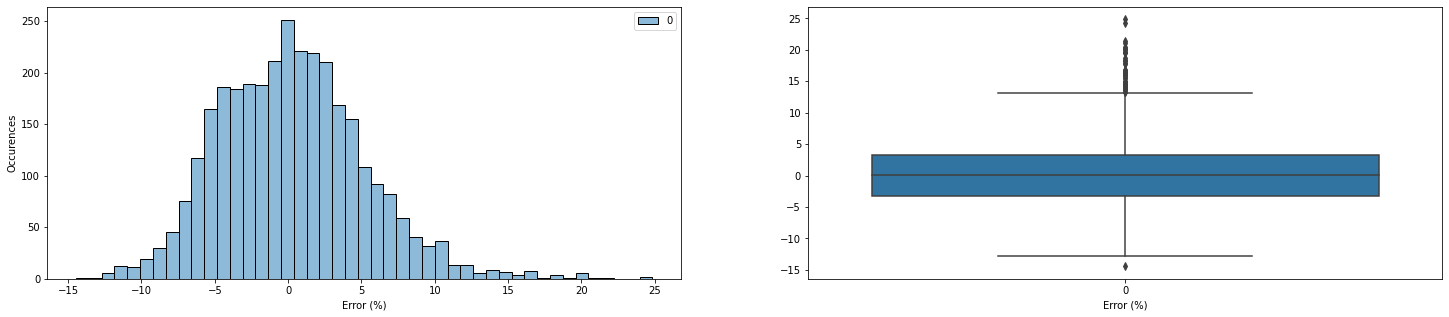

In [10]:
#Figure
plt.figure(figsize=(25,5))
#Histogram
ax = plt.subplot(1, 2, 1)
plt.ylabel('Occurences')
plt.xlabel('Error (%)')
sns.histplot(error_df);
#Boxplot
ax = plt.subplot(1, 2, 2)
plt.xlabel('Error (%)')
sns.boxplot(data = error_df);

The box plot confirms that errors above approximately 12 % are outliers. Those are probably due to abnormal operation of the plant. Thus, even with a low $R^2$ the prediction is reasonably good with error lower than 12%.





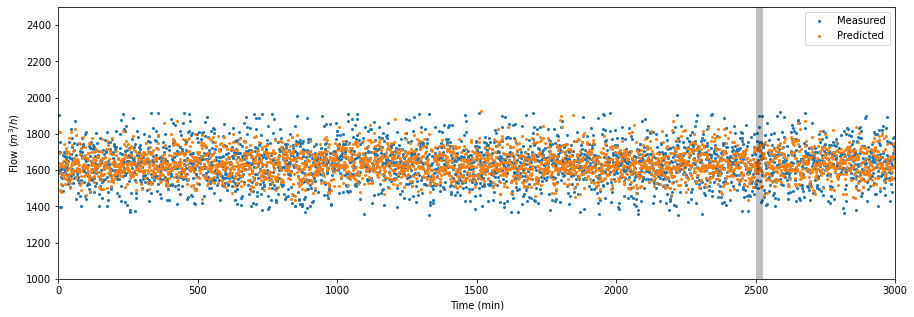

In [137]:
#Before plotting, create a new dimension as time
t = range(len(y_test))
#Plot the results
plt.figure(figsize=(15,5))
plt.xlabel('Time (min)')
plt.ylabel('Flow ($m^3/h$)')
plt.legend('Experimental')
plt.scatter(t,y_test, label = 'Measured', s = 4);
plt.scatter(t,yfit, label = 'Predicted', s = 4);
plt.xlim([0, 3000])
plt.ylim([1000, 2500])
plt.axvspan(2500, 2525, facecolor='k', alpha=0.25)
plt.legend()
plt.savefig("SVM_plot.png", dpi=200)
plt.show()

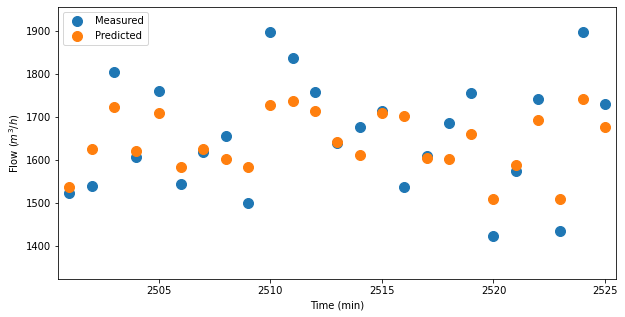

In [138]:
#Before plotting, create a new dimension as time
t = range(len(y_test))
#Plot the results
plt.figure(figsize=(10,5))
plt.xlabel('Time (min)')
plt.ylabel('Flow ($m^3/h$)')
plt.legend('Experimental')
plt.scatter(t,y_test, s = 100, label = "Measured");
plt.scatter(t,yfit, s = 100, label = "Predicted");
plt.xlim([2500.5, 2525.5])
plt.legend()
plt.savefig("SVM_plot_zoom.png", dpi=200)
plt.show()

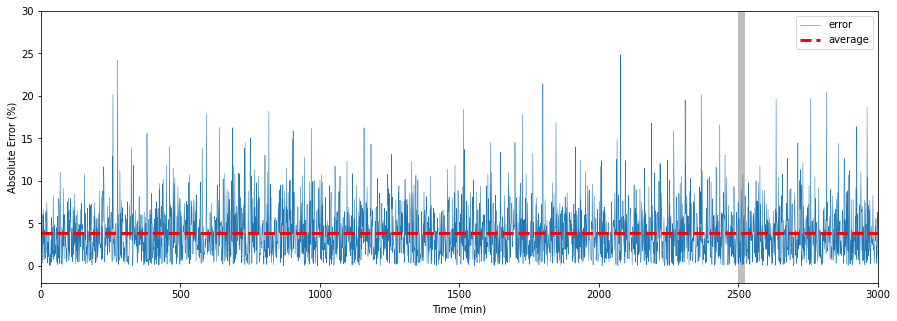

In [140]:
#Before plotting, create a new dimension as time
t = range(len(y_test))
#Plot the results
plt.figure(figsize=(15,5))
plt.xlabel('Time (min)')
plt.ylabel('Absolute Error (%)')
plt.legend('Experimental')
plt.plot(t,abs((y_test-yfit)/y_test)*100, label = "error", linewidth = 0.5);
plt.plot([0, 5000], [np.mean(abs((y_test-yfit)/y_test))*100, np.mean(abs((y_test-yfit)/y_test))*100], "r--", label = "average", linewidth = 3)
plt.xlim([0, 3000])
plt.ylim([-2, 30])
plt.axvspan(2500, 2525, facecolor='k', alpha=0.25)
plt.legend()
plt.savefig("SVM_error.png", dpi=200)
plt.show()

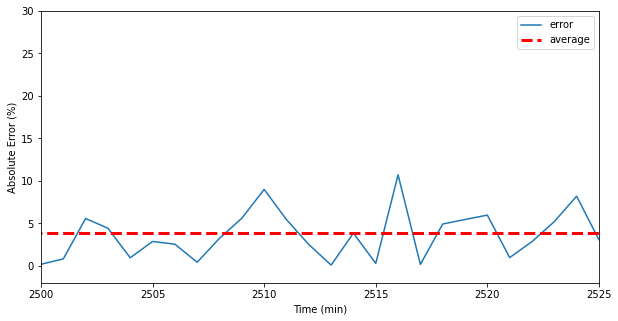

In [139]:
#Before plotting, create a new dimension as time
t = range(len(y_test))
#Plot the results
plt.figure(figsize=(10,5))
plt.xlabel('Time (min)')
plt.ylabel('Absolute Error (%)')
plt.legend('Experimental')
plt.plot(t,abs((y_test-yfit)/y_test)*100, label = "error");
plt.plot([0, 5000], [np.mean(abs((y_test-yfit)/y_test))*100, np.mean(abs((y_test-yfit)/y_test))*100], "r--", label = "average", linewidth = 3)
plt.xlim([2500, 2525])
plt.ylim([-2, 30])
plt.legend()
plt.savefig("SVM_error_zoom.png", dpi=200)
plt.show()